![data-x](http://oi64.tinypic.com/o858n4.jpg)


# Homework 10: LTI

*Code snippets given run on both Python 2.7 and Python 3.5*


## Topics covered:

* Correlation
* Convolution
* Fourier Transforms

# Part 1: Theoretical Questions

*Answer the questions below by either writing (LaTeX'ing) them in the Markdown cell or handing in handwritten solutions at the start of next lecture (if you write by hand, also scan your handwritten solutions and push them to Github)*

## Question 1.1
Derive the mathematical relationship between covariance and correlation. Explain, with words, the difference between these two measurements.

Covariance of (X,Y) is defined by
cov(X,Y) = E([X­E(X)][Y­E(Y)])

Correlation of (X,Y) is cor(X,Y) = cov(X,Y) / (sd(X)sd(Y))

Correlation is a scaled version of covariance. Correlation is dimensionless. Both are measuring the dependence between variables.
http://www.math.uah.edu/stat/expect/Covariance.html 

We can'normalize' the covariance, with the goal to get rid of large differences in scale that can occur between two different variables. The correlation between two variables is always of absolute value smaller than 1 (which is not the case for the covariance). 

Correlation is "purer" of the variability on of the 2 variables. This result is "purer" because the differences in ranges have been scaled out.



### Question 1.2
What is the difference between Pearson, Kendall, and Spearman correlation?

''
Pearson:-

Most widely used to measure relationship between linearly related variables
both variables should be normally distributed and homoscedastic (normally distributed about the regression line)

Both variables are assumed to be normally distributed. Linearity and homoscedasticity are both also assumed on the data. It is therefore a parametric test.


''
Kendall
non-parametric test that measures the strength of dependence between 2 variables

Quantitatively, the Kendall's coefficient is defined as (where n is the size of both datasets):

[Number of concordant pairs - Number of discordant pairs] / (n x (n-1)/2)

''
Spearman

Non-parametric test used to measure the degree of association between two variables,does not assume assumptions about the distribution of the data and is the appropriate correlation analysis when the variables are measured on a scale that is at least ordinal

Quantitatively, Spearman's coefficient can be calculated as:

1- 6x Sum(d^2)/(nx(n^2-1))

where the d's are the differences between the ranks of corresponding values in the two datasets X and Y.

### Question 1.3
Why can it be useful to look at the correlation between features when you're creating a machine learning model?

It is useful to understand the usefulness of a feature. By ranking correlation you can choose which features to
include or not include. This is helpful for feature selection, but also for feature engineering

We must try and eliminate redundant features from a model. Also, if predicting a variable is difficult, we can use another highly correlated variable for prediction. 

### Question 1.4
Intuitively, with words, explain the concept of convolution in the one dimensional case. Moreover, explain what cross-correlation, convolution, and auto-correlation have in common.

Convulation is the operation between two signals in 1D. A kernel or a filter slides over the signal in a common denomination. Every position of the kernel and the signal are added up to the result. Cross-correlation, correlation, convolution, and auto-correlation are all calculated using "similar" calculations (with integrals for continuous functions, or sums for discrete functions); They also all provide a measure of "similarity" between signals.


### Question 1.5
What is the difference between the *sample mean* and the *population mean*?

The sample mean is the mean calculated from a group of random variables, drawn from the population. It is usually an estimator of the "reality", which is the population mean. Population mean is the average of the all the elements in the population. The Central Limit Theorem states that as the sample size gets larger, the sample mean converges to the population mean.

### Question 1.6

Prove that the forward Fourier transform of the $\mathrm{rect}$ function is: $\mathfrak{F}_t(\Pi(t)) = \int_{-\infty}^\infty \Pi(t)\cdot e^{-i 2\pi f t} \, dt
=\frac{\sin(\pi f)}{\pi f} = \mathrm{sinc}{(\pi f)}$, by calculating the integral.

    Input your answer here

# Part 2

## 2.0: Pre-Setup

In [26]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function, division, absolute_import #make notebook compatible with Python 2 and Python 3

In [31]:
import pandas as pd
import numpy as np
from numpy.fft import fft
df = pd.read_csv("data.txt", header=0,sep=',')

In [32]:
'''Question 2.1.1.'''

oldname = df.columns
newname = []

for i in range(len(df.columns)):
    colname = df.columns[i]
    colname = colname.replace(" ", "")
    newname.append(colname)
df.rename(columns=dict(zip(oldname, newname)), inplace=True) 

In [33]:
df['YEARMODA'] = pd.to_datetime(df['YEARMODA'], format='%Y%m%d')

In [34]:
'''Question 2.1.2.: dropping several columns '''

df = df.drop(df.columns[[0,1,4,6,7,8,9,10,12,14,16,20,21,22]], axis=1)

In [35]:
'''Question 2.1.3.'''
df['YEARMODA'] = pd.to_datetime(df['YEARMODA'], format='%Y%m%d')
df.index = df['YEARMODA'] 
del df.index.name
df = df.drop('YEARMODA',1)

In [36]:
'''Question 2.1.4.'''

df['MAX'] = df['MAX'].str.replace('*','').astype(np.float64)
df['MIN'] = df['MIN'].str.replace('*','').astype(np.float64)
df['PRCP'] = df['PRCP'].str.replace('[a-zA-Z]', '').astype(np.float64)

In [37]:
'''Question 2.1.5.'''

# First step: replacing the missing samples by NaN:
df.loc[df.MAX > 9999, 'MAX'] = np.NaN
df.loc[df.MIN > 9999, 'MIN'] = np.NaN
df.loc[df.MXSPD > 999, 'MXSPD'] = np.NaN
df.loc[df.PRCP > 99, 'PRCP'] = np.NaN

# Second step: Replacing the NaN entries with linearly interpolated values
df = df.interpolate(method='linear', axis=1)

# Data description

- Data source: https://www.ncdc.noaa.gov/
- Data description: https://www7.ncdc.noaa.gov/CDO/GSOD_DESC.txt
- Data file: data.txt

# Question 2.1: Preprocess the data

- **2.1.1:** Read in the data in `data.txt` to a pandas DataFrame, and remove all white space characters in the column strings.


- **2.1.2:** Drop the columns with column indices `[0,1,4,6,7,8,9,10,12,14,16,20,21,22]`. I.e. you should only keep the `['YEARMODA', 'TEMP', 'DEWP', 'VISIB', 'WDSP', 'MXSPD', 'MAX', 'MIN','PRCP']` columns.


- **2.1.3:** Convert column `YEARMODA` to a Panda's Datetime object with `format='%Y%m%d'`. Assign the DataFrame index to be the Datetime converted `YEARMODA` column and delete the index name (with `del df.index.name`). Drop the column `YEARMODA` from the DataFrame.


- **2.1.4:** Columns `['MAX', 'MIN', 'PRCP']` contain non-numeric entries. Convert all these values in the three columns to dtype `float64`.


- **2.1.5:** There are some samples missing in the columns `['MAX','MIN','MXSPD','PRCP']`, these are recorded as unreasonably high values. See the Data description link above for further details. Assign `np.nan` (NaN) to these entries and then use pandas method `.interpolate()` on the DataFrame to replace the NaN entries with linearly interpolated, reasonable values.

In [38]:
'''Question 2.2.1'''
# We start by looking the correlation matrix:
df.corr()
# We then take the absolute values of that matrix, and rank it in increasing order:
a = df.corr().abs()
s = a.unstack()
so = s.order(kind="quicksort")
print (so)
# However, this list show for every pair, the pair (a,b) and the pair (b,a). We manually correct this.

MIN    VISIB    0.002161
VISIB  MIN      0.002161
MXSPD  PRCP     0.002570
PRCP   MXSPD    0.002570
       DEWP     0.011175
DEWP   PRCP     0.011175
MIN    PRCP     0.013746
PRCP   MIN      0.013746
       VISIB    0.014820
VISIB  PRCP     0.014820
WDSP   PRCP     0.016959
PRCP   WDSP     0.016959
TEMP   PRCP     0.033819
PRCP   TEMP     0.033819
MAX    PRCP     0.048936
PRCP   MAX      0.048936
TEMP   VISIB    0.111447
VISIB  TEMP     0.111447
MAX    VISIB    0.130933
VISIB  MAX      0.130933
MAX    WDSP     0.145763
WDSP   MAX      0.145763
VISIB  DEWP     0.163481
DEWP   VISIB    0.163481
WDSP   DEWP     0.175358
DEWP   WDSP     0.175358
VISIB  MXSPD    0.181134
MXSPD  VISIB    0.181134
       DEWP     0.185082
DEWP   MXSPD    0.185082
                  ...   
WDSP   VISIB    0.248780
VISIB  WDSP     0.248780
TEMP   MXSPD    0.274911
MXSPD  TEMP     0.274911
       MIN      0.326595
MIN    MXSPD    0.326595
WDSP   MIN      0.342578
MIN    WDSP     0.342578
DEWP   MAX      0.556367


In [ ]:
# Thus, the 8 pairs showing the lowest correlation are:
                Correlation
MIN    PRCP     0.002164
MIN    MXSPD    0.002165
PRCP   MXSPD    0.003103
PRCP   WDSP     0.010804
VISIB  MIN      0.015642
VISIB  PRCP     0.017955
DEWP   PRCP     0.019883
WDSP   MIN      0.025751

# The 8 pairs showing the highest correlation are:
                Correlation
WDSP   MAX      0.145763
VISIB  DEWP     0.163481
WDSP   DEWP     0.175358
WDSP   TEMP     0.230555
WDSP   VISIB    0.248780
MAX    DEWP     0.556367
DEWP   TEMP     0.735231
TEMP   MAX      0.890266

# Question 2.2: Correlation

- **2.2.1:** Find all the lowest (close to 0) and highest (close to 1 or -1, **hint:** look at the absolute value) correlation pairs in the DataFrame, excluding correlation with the same variable. Note that low correlation means abscence of correlation, i.e. the value is close to zero (and not negative numbers). High positive correlation is close to 1 and high negative correlation is close to -1. Answer with 8 correlation pairs for low correlation and 8 correlation pairs for high correlation.


- **2.2.2:** Look at features TEMP and WDSP (temperature and wind speed), find their yearly correlation and extract the year with the highest correlation, and the year with the lowest correlation between the two features. Hint: `df.index.year` will give you the years, and you can select yearly data by using `df[['TEMP','WDSP']]['1999']` (as an example for 1999). 


- **2.2.3:** Plot two plots, the first plot is the TEMP and WDSP signals (as line plots in the same plot) for the year with highest correlation, also subtract the individual mean for both features -- so that they are zero mean. Do the same in the second plot, but for the year with the lowest correlation between the features. Is it possible, by looking at the plots, to distinguish the highly correlated year from the year with the lowest correlation?

In [40]:
'''Question 2.2.2'''
from operator import itemgetter

# Step 1: Finding  yearly correlation
minyear = 1974
minyear = 2016

correllist = []
for i in range(1974,2017):
    mat = df[['TEMP','WDSP']][str(i)].corr()
    correl = mat['WDSP'][0]
    correllist.append([i,correl])
    
# Step 2: year with highest and lowest correl
correllistsorted = sorted(correllist,key=itemgetter(1))
print ('The year with the lowest correlation between TEMP and WSDP is %d with a correlaiton of %.2f' %(correllistsorted[0][0],correllistsorted[0][1]))

print ('Year with the highest correlation between TEMP and WSDP is %d with a correlaiton of %.2f' %(correllistsorted[len(correllist)-1][0],correllistsorted[len(correllist)-1][1]))

The year with the lowest correlation between TEMP and WSDP is 2008 with a correlaiton of 0.04
Year with the highest correlation between TEMP and WSDP is 1994 with a correlaiton of 0.41


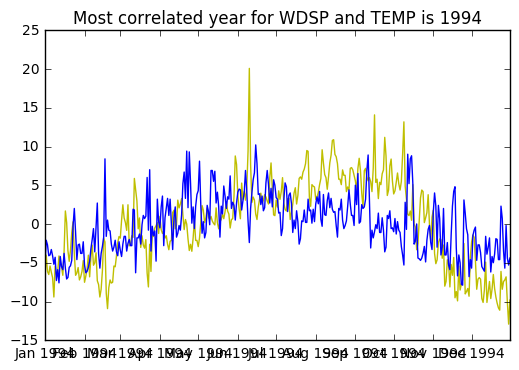

In [43]:
'''
**2.2.3:** Plot two plots, the first plot is the TEMP and WDSP signals (as line plots in the same plot) for the year 
    with highest correlation, also subtract the individual mean for both features -- so that they are zero mean. 
    Do the same in the second plot, but for the year with the lowest correlation between the features. 
    Is it possible, by looking at the plots, to distinguish the highly correlated year from the year 
    with the lowest correlation?

'''
TEMP_1994 = df['TEMP']['1994'] - df['TEMP']['1994'].mean()
WDSP_1994 = df['WDSP']['1994'] - df['WDSP']['1994'].mean()

plt.plot(TEMP_1994,'y') 
plt.plot(WDSP_1994,'b') 
plt.title('Most correlated year for WDSP and TEMP is 1994')
plt.show()

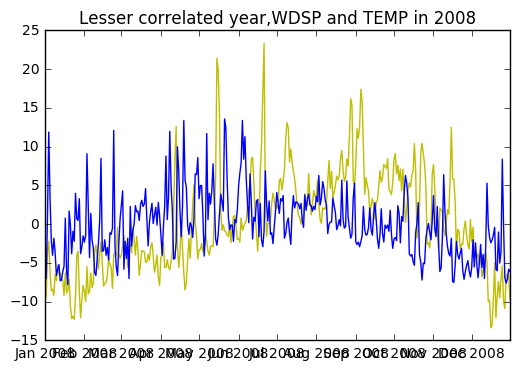

In [50]:
TEMP_2008 = df['TEMP']['2008'] - df['TEMP']['2008'].mean()
WDSP_2008 = df['WDSP']['2008'] - df['WDSP']['2008'].mean()

plt.plot(TEMP_2008,'y') 
plt.plot(WDSP_2008,'b') 
plt.title('Lesser correlated year,WDSP and TEMP in 2008')

plt.show()

# Question 2.3: FFT & Convolution

If you are unsure about the answers to the questions below, please look through the lecutre notes on FFT and LTI, found here: https://github.com/ikhlaqsidhu/data-x/tree/master/04b-theory-data-signal-lti

- **2.3.1:** Create a variable called signal with the temperature data, i.e.: `signal = df['TEMP']`. Subtract the mean from the signal (so that it becomes zero mean).


- **2.3.2:** Take monthly mean samples from the signal (hint: use pandas method `.resample('M',how='mean')`. If you run `signal.shape`, on the resampled signal, it should be `(516,)`.


- **2.3.3:** Plot the absolute value of the FFT of the resampled signal, i.e. `fft_x = np.abs(np.fft.fft(signal))`. Where do you expect to find peaks on the frequency spectrum, and why? How is this related to (eventual) seasonality in the temperature data?


- **2.3.4:** Instead of plotting the direct Fourier transform of the resampled signal, only plot the first half and normalize it, to get the correct amplitude. I.e. `2/len(signal) * fft_x[:int(np.ceil(len(signal)/2))]`). Plot this normalized, first half of the FFT.


- **2.3.5:** Convolve the resampled signal (from **2.3.2**), with a rect function that is half the length of a period in the temp data (i.e. 6 months, since we resampled monthly). Hint: use `np.convolve(signal,rect)` where `rect = np.ones(6)/6`. Plot the the resulting, convolved signal and explain what happened.


- **2.3.6:** Take the FFT of the convolved signal and normalize it (i.e. multiply by `2.0/n`). Only plot the first half of the FFT (just like in **2.3.4**). What has changed in the frequency spectrum after the signal was convolved? Also, try to explain why this happened.

In [58]:
# Install package mpld3 if you want to be able to zoom in plots: https://anaconda.org/conda-forge/mpld3
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [59]:
'''Question 2.3.1 '''
# We create the variable signal, so that it has zero-mean:
signals = df['TEMP'] - df['TEMP'].mean()

In [60]:
'''Question 2.3.2 '''

signals = signals.resample('M',how = 'mean')

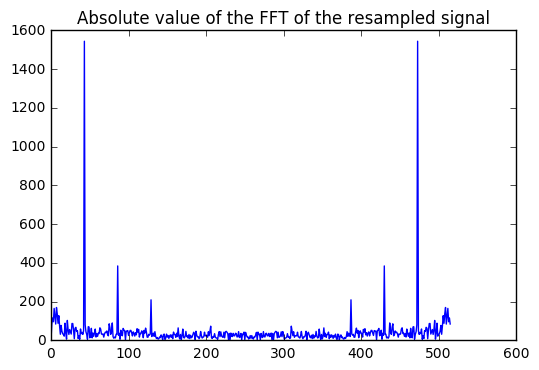

In [61]:
''' Question 2.3.3 '''
# Absolute value of the FFT of the resampled signal:
fft_x = np.abs(np.fft.fft(signal))
plt.plot(fft_x,'b') 
plt.title('Absolute value of the FFT of the resampled signal')
plt.show()

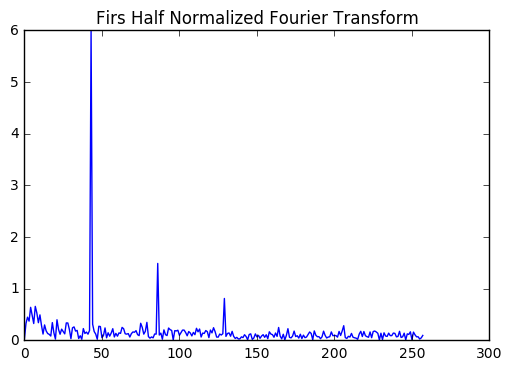

In [62]:
''' Question 2.3.4 '''
half_normalized_signal = 2/len(signal) * fft_x[:int(np.ceil(len(signal)/2))]
plt.plot(half_normalized_signal,'b') 
plt.title('Firs Half Normalized Fourier Transform')
plt.show()

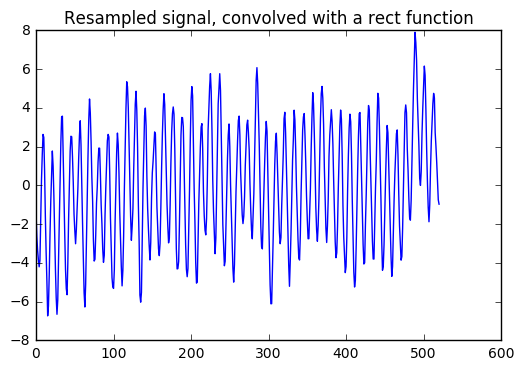

In [63]:
''' Question 2.3.5 '''
# Resampled signal
signal = signal.resample('M',how = 'mean')
rect = np.ones(6)/6 # rect function that is half the length of a period in the temp data
convolved_signal = np.convolve(signal,rect)
plt.plot(convolved_signal,'b') 
plt.title('Resampled signal, convolved with a rect function')
plt.show()
# After convolution with the rect function, we can visualize fully all of the in-month variations. The graph looks more volatile.

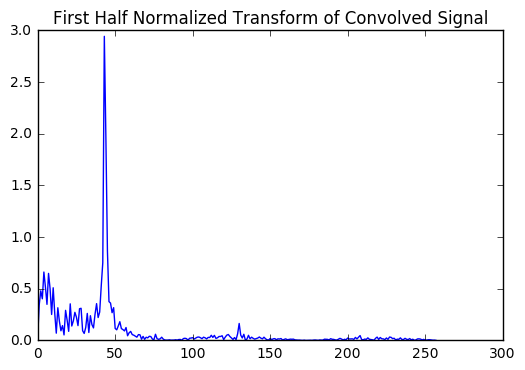

In [64]:
''' Question 2.3.6'''
fft_x_new = np.abs(np.fft.fft(convolved_signal))

half_normalized_convolved_signal = 2/len(signal) * fft_x_new[:int(np.ceil(len(signal)/2))]

plt.plot(half_normalized_convolved_signal,'b') 
plt.title('First Half Normalized Transform of Convolved Signal')
plt.show()

The function smoothens the signal.
Taking the average of the signal over each month results in the function having such an effect. We see peaks with slight variations.

In [ ]:
'''Input answers to Question 2.3'''